## CSP
CSP creates a simple, general way to represent many problems. It avoids using domain-specific heuristics so that the algorithm can be applied across many problems with little or no modifications. <br> 
In this report we implemented a class CSP which inherits Problem. Problem is the base class representing any problem and CSP can be any constraint-satisfaction-problem.<br>
We wanted to solve graph-coloring problem. Function MapColoringCSP creates an instance of CSP given available colors and a dictionary of neighbours describing tha map. <br>
The following cells expriments with the problem and exhibits results in different settings. <br> See the implementation at the end. The code is 

Next cell colors australia map which was used as an example to demonstrate backtracking algorithm in the textbook.

In [74]:
backtracking_search(australia_csp) 

{'WA': 'R', 'NT': 'G', 'SA': 'B', 'Q': 'R', 'NSW': 'G', 'V': 'R'}

To compare different heuristics introduced in the textbook we will use USA map because of its 
large number of states. Lets first solve it using the naive approach.

### Naive backtracking
Naive backtracking uses no heuristics. It chooses next variable to color randomely. No ordering is used to prioritize colors. The naive approach makes no use of inferences.

In [115]:
%timeit backtracking_search(usa_csp)

927 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### MRV
Next cell shows the results simply by using MRV. 

In [122]:
backtracking_search(usa_csp, select_unassigned_variable=mrv);

### LCV
We can also use LCV to order domain values. 

In [121]:
backtracking_search(usa_csp, select_unassigned_variable=mrv, order_domain_values=lcv);

### Forward checking
forward checking can also be used for constraint propogation.

In [120]:
backtracking_search(\
usa_csp, select_unassigned_variable=mrv,\
order_domain_values=lcv,\
inference=forward_checking);

### Visualizing the results 
We used `networkx` and to visualize the results. Below you can see the results for both USA and Australia. 

In [59]:
import networkx as nx
import matplotlib.pyplot as plt 

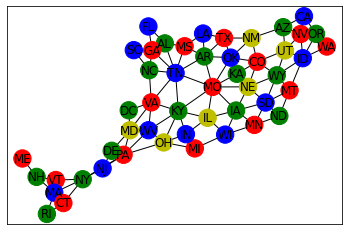

In [101]:
usa_results = backtracking_search(usa_csp)
usa_colors = list(map(lambda x: x.lower(), usa_results.values()))
usa_map = nx.Graph(usa_csp.neighbors)
nx.draw_networkx(usa_map, with_labels=True, node_color=usa_colors)

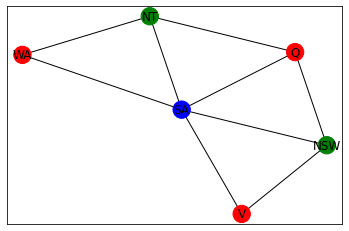

In [127]:
australia_results = backtracking_search(australia_csp) 
australia_colors = list(map(lambda x: x.lower(), australia_results.values()))
australia_map = nx.Graph(australia_csp.neighbors) 
nx.draw_networkx(australia_map, with_labels=True, node_color=australia_colors)

In [124]:
from collections import defaultdict
class UniversalDict:
    """A universal dict maps any key to the same value. We use it here
    as the domains dict for CSPs in which all variables have the same domain.
    >>> d = UniversalDict(42)
    >>> d['life']
    42
    """

    def __init__(self, value): self.value = value

    def __getitem__(self, key): return self.value

    def __repr__(self): return '{{Any: {0!r}}}'.format(self.value)


def different_values_constraint(A, a, B, b):
    """A constraint saying two neighboring variables must differ in value."""
    return a != b


def MapColoringCSP(colors, neighbors):
    """Make a CSP for the problem of coloring a map with different colors
    for any two adjacent regions. Arguments are a list of colors, and a
    dict of {region: [neighbor,...]} entries. This dict may also be
    specified as a string of the form defined by parse_neighbors."""
    if isinstance(neighbors, str):
        neighbors = parse_neighbors(neighbors)
    return CSP(list(neighbors.keys()), UniversalDict(colors), neighbors, different_values_constraint)


def parse_neighbors(neighbors):
    """Convert a string of the form 'X: Y Z; Y: Z' into a dict mapping
    regions to neighbors. The syntax is a region name followed by a ':'
    followed by zero or more region names, followed by ';', repeated for
    each region name. If you say 'X: Y' you don't need 'Y: X'.
    >>> parse_neighbors('X: Y Z; Y: Z') == {'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}
    True
    """
    dic = defaultdict(list)
    specs = [spec.split(':') for spec in neighbors.split(';')]
    for (A, Aneighbors) in specs:
        A = A.strip()
        for B in Aneighbors.split():
            dic[A].append(B)
            dic[B].append(A)
    return dic


australia_csp = MapColoringCSP(list('RGB'), """SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: """)

usa_csp = MapColoringCSP(list('RGBY'),
                         """WA: OR ID; OR: ID NV CA; CA: NV AZ; NV: ID UT AZ; ID: MT WY UT;
                         UT: WY CO AZ; MT: ND SD WY; WY: SD NE CO; CO: NE KA OK NM; NM: OK TX AZ;
                         ND: MN SD; SD: MN IA NE; NE: IA MO KA; KA: MO OK; OK: MO AR TX;
                         TX: AR LA; MN: WI IA; IA: WI IL MO; MO: IL KY TN AR; AR: MS TN LA;
                         LA: MS; WI: MI IL; IL: IN KY; IN: OH KY; MS: TN AL; AL: TN GA FL;
                         MI: OH IN; OH: PA WV KY; KY: WV VA TN; TN: VA NC GA; GA: NC SC FL;
                         PA: NY NJ DE MD WV; WV: MD VA; VA: MD DC NC; NC: SC; NY: VT MA CT NJ;
                         NJ: DE; DE: MD; MD: DC; VT: NH MA; MA: NH RI CT; CT: RI; ME: NH;
                         HI: ; AK: """)

france_csp = MapColoringCSP(list('RGBY'),
                            """AL: LO FC; AQ: MP LI PC; AU: LI CE BO RA LR MP; BO: CE IF CA FC RA
                            AU; BR: NB PL; CA: IF PI LO FC BO; CE: PL NB NH IF BO AU LI PC; FC: BO
                            CA LO AL RA; IF: NH PI CA BO CE; LI: PC CE AU MP AQ; LO: CA AL FC; LR:
                            MP AU RA PA; MP: AQ LI AU LR; NB: NH CE PL BR; NH: PI IF CE NB; NO:
                            PI; PA: LR RA; PC: PL CE LI AQ; PI: NH NO CA IF; PL: BR NB CE PC; RA:
                            AU BO FC PA LR""")

australia_csp = MapColoringCSP(list('RGB'),
                              """WA: NT SA; NT: Q SA WA; SA: WA NT Q NSW V; Q: NSW SA NT; NSW: V 
                              SA Q; V: NSW SA""")



In [20]:

def first_unassigned_variable(assignment, csp):
    """The default variable order."""
    return first([var for var in csp.variables if var not in assignment])

def mrv(assignment, csp):
    """Minimum-remaining-values heuristic."""
    return argmin_random_tie([v for v in csp.variables if v not in assignment],
                             key=lambda var: num_legal_values(csp, var, assignment))

def num_legal_values(csp, var, assignment):
    if csp.curr_domains:
        return len(csp.curr_domains[var])
    else:
        return count(csp.nconflicts(var, val, assignment) == 0 for val in csp.domains[var])

def unordered_domain_values(var, assignment, csp):
    """The default value order."""
    return csp.choices(var)


def lcv(var, assignment, csp):
    """Least-constraining-values heuristic."""
    return sorted(csp.choices(var), key=lambda val: csp.nconflicts(var, val, assignment))

def no_inference(csp, var, value, assignment, removals):
    return True

def forward_checking(csp, var, value, assignment, removals):
    """Prune neighbor values inconsistent with var=value."""
    csp.support_pruning()
    for B in csp.neighbors[var]:
        if B not in assignment:
            for b in csp.curr_domains[B][:]:
                if not csp.constraints(var, value, B, b):
                    csp.prune(B, b, removals)
            if not csp.curr_domains[B]:
                return False
    return True


# The search, proper


def backtracking_search(csp, select_unassigned_variable=first_unassigned_variable,
                        order_domain_values=unordered_domain_values, inference=no_inference):
    """[Figure 6.5]"""

    def backtrack(assignment):
        if len(assignment) == len(csp.variables):
            return assignment
        var = select_unassigned_variable(assignment, csp)
        for value in order_domain_values(var, assignment, csp):
            if 0 == csp.nconflicts(var, value, assignment):
                csp.assign(var, value, assignment)
                removals = csp.suppose(var, value)
                if inference(csp, var, value, assignment, removals):
                    result = backtrack(assignment)
                    if result is not None:
                        return result
                csp.restore(removals)
        csp.unassign(var, assignment)
        return None

    result = backtrack({})
    assert result is None or csp.goal_test(result)
    return result


In [19]:

def no_arc_heuristic(csp, queue):
    return queue

def AC3(csp, queue=None, removals=None, arc_heuristic=no_arc_heuristic):
    """[Figure 6.3]"""
    if queue is None:
        queue = {(Xi, Xk) for Xi in csp.variables for Xk in csp.neighbors[Xi]}
    csp.support_pruning()
    queue = arc_heuristic(csp, queue)
    checks = 0
    while queue:
        (Xi, Xj) = queue.pop()
        revised, checks = revise(csp, Xi, Xj, removals, checks)
        if revised:
            if not csp.curr_domains[Xi]:
                return False, checks  # CSP is inconsistent
            for Xk in csp.neighbors[Xi]:
                if Xk != Xj:
                    queue.add((Xk, Xi))
    return True, checks  # CSP is satisfiable


def revise(csp, Xi, Xj, removals, checks=0):
    """Return true if we remove a value."""
    revised = False
    for x in csp.curr_domains[Xi][:]:
        # If Xi=x conflicts with Xj=y for every possible y, eliminate Xi=x
        # if all(not csp.constraints(Xi, x, Xj, y) for y in csp.curr_domains[Xj]):
        conflict = True
        for y in csp.curr_domains[Xj]:
            if csp.constraints(Xi, x, Xj, y):
                conflict = False
            checks += 1
            if not conflict:
                break
        if conflict:
            csp.prune(Xi, x, removals)
            revised = True
    return revised, checks


In [18]:

class CSP(Problem):
    """This class describes finite-domain Constraint Satisfaction Problems.
    A CSP is specified by the following inputs:
        variables   A list of variables; each is atomic (e.g. int or string).
        domains     A dict of {var:[possible_value, ...]} entries.
        neighbors   A dict of {var:[var,...]} that for each variable lists
                    the other variables that participate in constraints.
        constraints A function f(A, a, B, b) that returns true if neighbors
                    A, B satisfy the constraint when they have values A=a, B=b
    In the textbook and in most mathematical definitions, the
    constraints are specified as explicit pairs of allowable values,
    but the formulation here is easier to express and more compact for
    most cases (for example, the n-Queens problem can be represented
    in O(n) space using this notation, instead of O(n^4) for the
    explicit representation). In terms of describing the CSP as a
    problem, that's all there is.
    However, the class also supports data structures and methods that help you
    solve CSPs by calling a search function on the CSP. Methods and slots are
    as follows, where the argument 'a' represents an assignment, which is a
    dict of {var:val} entries:
        assign(var, val, a)     Assign a[var] = val; do other bookkeeping
        unassign(var, a)        Do del a[var], plus other bookkeeping
        nconflicts(var, val, a) Return the number of other variables that
                                conflict with var=val
        curr_domains[var]       Slot: remaining consistent values for var
                                Used by constraint propagation routines.
    The following methods are used only by graph_search and tree_search:
        actions(state)          Return a list of actions
        result(state, action)   Return a successor of state
        goal_test(state)        Return true if all constraints satisfied
    The following are just for debugging purposes:
        nassigns                Slot: tracks the number of assignments made
        display(a)              Print a human-readable representation
    """
    
    def __init__(self, variables, domains, neighbors, constraints):
        """Construct a CSP problem. If variables is empty, it becomes domains.keys()."""
        super().__init__(())
        variables = variables or list(domains.keys())
        self.variables = variables
        self.domains = domains
        self.neighbors = neighbors
        self.constraints = constraints
        self.curr_domains = None
        self.nassigns = 0

    def assign(self, var, val, assignment):
        """Add {var: val} to assignment; Discard the old value if any."""
        assignment[var] = val
        self.nassigns += 1

    def unassign(self, var, assignment):
        """Remove {var: val} from assignment.
        DO NOT call this if you are changing a variable to a new value;
        just call assign for that."""
        if var in assignment:
            del assignment[var] 
    
    def nconflicts(self, var, val, assignment):
        """Return the number of conflicts var=val has with other variables."""

        # Subclasses may implement this more efficiently
        def conflict(var2):
            return var2 in assignment and not self.constraints(var, val, var2, assignment[var2])

        return count(conflict(v) for v in self.neighbors[var])
    
    def display(self, assignment):
        """Show a human-readable representation of the CSP."""
        # Subclasses can print in a prettier way, or display with a GUI
        print(assignment)

    # These methods are for the tree and graph-search interface:

    def actions(self, state):
        """Return a list of applicable actions: non conflicting
        assignments to an unassigned variable."""
        if len(state) == len(self.variables):
            return []
        else:
            assignment = dict(state)
            var = first([v for v in self.variables if v not in assignment])
            return [(var, val) for val in self.domains[var]
                    if self.nconflicts(var, val, assignment) == 0]
    
    def result(self, state, action):
        """Perform an action and return the new state."""
        (var, val) = action
        return state + ((var, val),)

    def goal_test(self, state):
        """The goal is to assign all variables, with all constraints satisfied."""
        assignment = dict(state)
        return (len(assignment) == len(self.variables)
                and all(self.nconflicts(variables, assignment[variables], assignment) == 0
                        for variables in self.variables))

    
    # These are for constraint propagation

    def support_pruning(self):
        """Make sure we can prune values from domains. (We want to pay
        for this only if we use it.)"""
        if self.curr_domains is None:
            self.curr_domains = {v: list(self.domains[v]) for v in self.variables}

    def suppose(self, var, value):
        """Start accumulating inferences from assuming var=value."""
        self.support_pruning()
        removals = [(var, a) for a in self.curr_domains[var] if a != value]
        self.curr_domains[var] = [value]
        return removals
    
    def prune(self, var, value, removals):
        """Rule out var=value."""
        self.curr_domains[var].remove(value)
        if removals is not None:
            removals.append((var, value))

    def choices(self, var):
        """Return all values for var that aren't currently ruled out."""
        return (self.curr_domains or self.domains)[var]

    def infer_assignment(self):
        """Return the partial assignment implied by the current inferences."""
        self.support_pruning()
        return {v: self.curr_domains[v][0]
                for v in self.variables if 1 == len(self.curr_domains[v])}

    def restore(self, removals):
        """Undo a supposition and all inferences from it."""
        for B, b in removals:
            self.curr_domains[B].append(b)
    
    
    # This is for min_conflicts search
    
    def conflicted_vars(self, current):
        """Return a list of variables in current assignment that are in conflict"""
        return [var for var in self.variables
                if self.nconflicts(var, current[var], current) > 0]
    

In [17]:
class Problem:
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal
    
    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1
    
    def value(self, state):
        """For optimization problems, each state has a value. Hill Climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError




In [16]:
import random 

identity = lambda x: x

def first(iterable, default=None):
    """Return the first element of an iterable; or default."""
    return next(iter(iterable), default)

def extend(s, var, val):
    """Copy dict s and extend it by setting var to val; return copy."""
    return {**s, var: val}

def count(seq):
    """Count the number of items in sequence that are interpreted as true."""
    return sum(map(bool, seq))

def argmin_random_tie(seq, key=identity):
    """Return a minimum element of seq; break ties at random."""
    return min(shuffled(seq), key=key)

def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    random.shuffle(items)
    return items


### References
- AI: a modern approach 
- AIMA: official code repository for `AI: a modern appraoch`